In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Bài thực hành 5 DS102.P21.1
Dương Tấn Lộc
23520854

- Webapp: https://xray-pneunomia-detection-bylocluclak.streamlit.app/
- Github repo: https://github.com/locluclak/xray-pneunomia-detection

**Bộ dữ liệu Chest X-ray Pneumonia**
Bộ dữ liệu Chest X-ray Pneumonia có ý nghĩa hỗ trợ chẩn đoán viêm phổi qua hình ảnh x-ray ngực. Bằng cách cung cấp các hình ảnh được phân loại rõ ràng thành hai nhóm: "Pneumonia" (viêm phổi) và "Normal" (bình thường)

Bộ dữ liệu này giúp các chuyên gia y tế và nhà nghiên cứu nhận diện các đặc điểm hình ảnh liên quan đến bệnh viêm phổi. 

Hữu ích trong việc nâng cao hiệu quả chẩn đoán và hỗ trợ đào tạo trong lĩnh vực y học và tạo ra các mô hình máy học hỗ trợ.

## Load dữ liệu

In [2]:
print(os.listdir('../input'))

['chest-xray-pneumonia']


* Dữ liệu được resize thành 64x64
* Chuyển thành 1 kênh màu (do ảnh x-ray chỉ có trắng đen)
* Lưu vào data X và label y

In [3]:
import glob
import numpy as np
import cv2
from tqdm import tqdm

IMG_SIZE = 64

def load_dataset(path):
    X = []
    y = []
    classes = ['NORMAL', 'PNEUMONIA']

    all_files = []
    labels = []

    for c in classes:
        files = glob.glob(path + c + "/*.jpeg")
        all_files.extend(files)
        labels.extend([c] * len(files))

    for f, label in tqdm(zip(all_files, labels), total=len(all_files), desc="Loading images"):
        img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img)
        y.append(label)

    # Convert X to numpy array and add channel dimension (N, H, W, 1)
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y = np.array(y)

    assert(X.size > 0), 'Cannot read file'
    return (X, y)

In [4]:
path = "/kaggle/input/chest-xray-pneumonia/chest_xray/"

In [5]:
!zip -r /kaggle/working/chest_xray.zip /kaggle/input/chest-xray-pneumonia/chest_xray/val


  adding: kaggle/input/chest-xray-pneumonia/chest_xray/val/ (stored 0%)
  adding: kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/ (stored 0%)
  adding: kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg (deflated 1%)
  adding: kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg (deflated 1%)
  adding: kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg (deflated 1%)
  adding: kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg (deflated 4%)
  adding: kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg (deflated 1%)
  adding: kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg (deflated 1%)
  adding: kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg (deflated 1%)
  adding: kaggle/input/chest-xray-pneumonia/chest_xray/

In [6]:
print(os.listdir(path))

['chest_xray', '__MACOSX', 'val', 'test', 'train']


In [7]:
X_train, y_train = load_dataset(path+"train/")

Loading images: 100%|██████████| 5216/5216 [01:37<00:00, 53.35it/s]


In [8]:
X_val, y_val = load_dataset(path+"val/")

Loading images: 100%|██████████| 16/16 [00:00<00:00, 147.53it/s]


In [9]:
X_test, y_test = load_dataset(path+"test/")

Loading images: 100%|██████████| 624/624 [00:10<00:00, 58.90it/s]


In [10]:
print("Size of train data:", X_train.shape)
print("Size of validation data:", X_val.shape)
print("Size of test data:", X_test.shape)


Size of train data: (5216, 64, 64, 1)
Size of validation data: (16, 64, 64, 1)
Size of test data: (624, 64, 64, 1)


- Train data gồm: 5216 mẫu
- Validation data gồm: 16 mẫu
- Test data gồm: 624 mẫu

## Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter


def plot_label_distribution(y_train, y_val, y_test):
    train_counts = Counter(y_train)
    val_counts = Counter(y_val)
    test_counts = Counter(y_test)

    df = pd.DataFrame([
        {'set': 'Train', 'label': label, 'count': count}
        for label, count in train_counts.items()
    ] + [
        {'set': 'Validation', 'label': label, 'count': count}
        for label, count in val_counts.items()
    ] + [
        {'set': 'Test', 'label': label, 'count': count}
        for label, count in test_counts.items()
    ])

    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x='set', y='count', hue='label')
    plt.title('Label Distribution Across Dataset Splits')
    plt.ylabel('Number of Images')
    plt.xlabel('Dataset Split')
    plt.legend(title='Label')
    plt.tight_layout()
    plt.show()

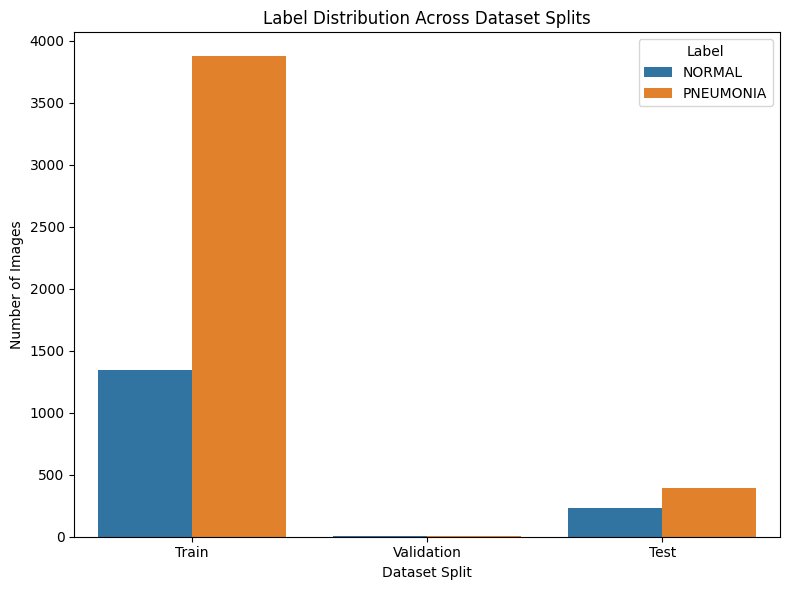

In [12]:
plot_label_distribution(y_train, y_val, y_test)

In [13]:
def print_normal_pneumonia_ratio(y, name=""):
    counter = Counter(y)
    normal = counter.get('NORMAL', 0)
    pneumonia = counter.get('PNEUMONIA', 0)

    if pneumonia == 0:
        print("Cannot compute ratio: PNEUMONIA count is 0.")
    else:
        ratio = normal / pneumonia
        print(f"{name}, NORMAL / PNEUMONIA: {normal} / {pneumonia} = {ratio:.2f}")

In [14]:
print_normal_pneumonia_ratio(y_train, "Train")
print_normal_pneumonia_ratio(y_val, "Validation")
print_normal_pneumonia_ratio(y_test, "Test")

Train, NORMAL / PNEUMONIA: 1341 / 3875 = 0.35
Validation, NORMAL / PNEUMONIA: 8 / 8 = 1.00
Test, NORMAL / PNEUMONIA: 234 / 390 = 0.60


Tập trên có tỉ lệ bình thường/viêm phổi là 0.35, cho thấy phân bố 2 lớp bị lệch mạnh. 

Tập test có lệch nhưng không bị lệch mạnh như tập train.

In [15]:
def show_image(X, y, index=0):
    img = X[index]
    label = y[index]

    # If grayscale (1 channel), remove last dimension for imshow
    if img.shape[-1] == 1:
        img = img.squeeze()

    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()


In [16]:
y_train

array(['NORMAL', 'NORMAL', 'NORMAL', ..., 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA'], dtype='<U9')

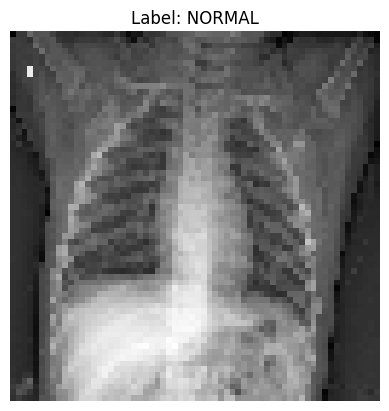

In [17]:
show_image(X_train, y_train, index = 0)

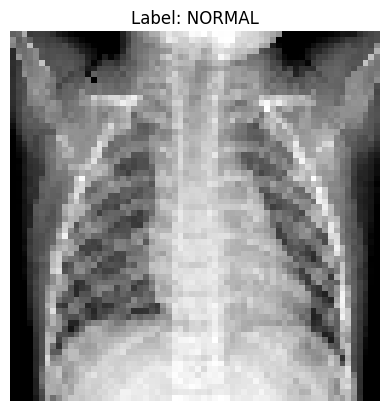

In [18]:
show_image(X_train, y_train, index = 1)


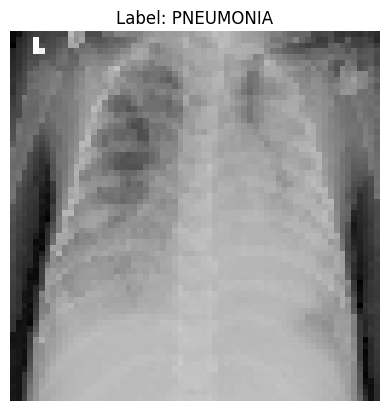

In [19]:
show_image(X_train, y_train, index = -1)


## Preprocessing

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, make_scorer, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

### Vectorize data and encode label

In [21]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_val_enc = encoder.transform(y_val)
y_test_enc = encoder.transform(y_test)


NORMAL: 0

PNEUMONIA: 1


### Scale data

Sử dụng Standard Scaler

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flat)
X_val_std = scaler.transform(X_val_flat)
X_test_std = scaler.transform(X_test_flat)

## Feature engineering 
Giảm chiều dữ liệu bằng PCA với 95% variance gốc

In [23]:
from sklearn.decomposition import PCA
pca_full = PCA().fit(X_train_std)
explained_variance = pca_full.explained_variance_ratio_.cumsum()

import numpy as np
n_components_95 = np.argmax(explained_variance >= 0.95) + 1

In [24]:
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_std)
X_val_pca = pca.transform(X_val_std)
X_test_pca = pca.transform(X_test_std)

## Model training

Vì nhãn của các bộ dữ liệu không cân bằng nên không thể đánh giá bằng Accuracy.

Chọn F1-score phù hợp hơn với dataset

### Logistic Regression

In [25]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_pca, y_train_enc)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [26]:
val_preds = model.predict(X_val_pca)
test_preds = model.predict(X_test_pca)

print("Validation Accuracy:", accuracy_score(y_val_enc, val_preds))
print("Test Accuracy:", accuracy_score(y_test_enc, test_preds))
print("\nClassification Report on Test Set:")
print(classification_report(y_test_enc, test_preds, target_names=encoder.classes_))

Validation Accuracy: 0.9375
Test Accuracy: 0.75

Classification Report on Test Set:
              precision    recall  f1-score   support

      NORMAL       0.93      0.36      0.52       234
   PNEUMONIA       0.72      0.98      0.83       390

    accuracy                           0.75       624
   macro avg       0.83      0.67      0.67       624
weighted avg       0.80      0.75      0.71       624



### SVM

In [27]:
from sklearn.svm import SVC

svm = SVC(class_weight='balanced',kernel='linear')  
svm.fit(X_train_pca, y_train_enc)

test_preds = svm.predict(X_test_pca)

print("Validation Accuracy:", accuracy_score(y_val_enc, val_preds))
print("Test Accuracy:", accuracy_score(y_test_enc, test_preds))
print("\nClassification Report on Test Set:")
print(classification_report(y_test_enc, test_preds, target_names=encoder.classes_))

Validation Accuracy: 0.9375
Test Accuracy: 0.7451923076923077

Classification Report on Test Set:
              precision    recall  f1-score   support

      NORMAL       0.92      0.35      0.51       234
   PNEUMONIA       0.72      0.98      0.83       390

    accuracy                           0.75       624
   macro avg       0.82      0.67      0.67       624
weighted avg       0.79      0.75      0.71       624



In [28]:
f1 = make_scorer(f1_score, average='binary', pos_label=1)

In [29]:
from sklearn.model_selection import GridSearchCV

### Fine-tuning 

Fine-tuning Logistic regression

In [30]:
param_grid = {
    'C': [0.05, 0.1, 0.5],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']   
}

logreg = LogisticRegression(class_weight='balanced',max_iter=1000)   
lr_grid = GridSearchCV(logreg, param_grid, cv=3, scoring=f1, verbose=1)
lr_grid.fit(X_train_pca, y_train_enc)

print("Best Parameters:", lr_grid.best_params_)
print("Best Cross-Validation Score:", lr_grid.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Score: 0.9698688992267436


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
lr_test_preds = lr_grid.predict(X_test_pca)
print("Test Accuracy:", accuracy_score(y_test_enc, lr_test_preds))
print("\nClassification Report:")
print(classification_report(y_test_enc, lr_test_preds, target_names=encoder.classes_))

Test Accuracy: 0.7708333333333334

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.41      0.57       234
   PNEUMONIA       0.74      0.99      0.84       390

    accuracy                           0.77       624
   macro avg       0.85      0.70      0.71       624
weighted avg       0.82      0.77      0.74       624



Fine-tuning SVM

In [32]:
param_grid = {
    'C': [5,10,15],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(class_weight='balanced')
grid = GridSearchCV(svm, param_grid, scoring=f1, cv=3, verbose=1)
grid.fit(X_train_pca, y_train_enc)

print("Best Parameters:", grid.best_params_)
print("Best F1 Score (CV):", grid.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score (CV): 0.9826490423728419


In [33]:
svm_test_preds = grid.predict(X_test_pca)
print("Test Accuracy:", accuracy_score(y_test_enc, svm_test_preds))
print("\nClassification Report:")
print(classification_report(y_test_enc, svm_test_preds, target_names=encoder.classes_))

Test Accuracy: 0.7644230769230769

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.97      0.38      0.55       234
   PNEUMONIA       0.73      0.99      0.84       390

    accuracy                           0.76       624
   macro avg       0.85      0.69      0.70       624
weighted avg       0.82      0.76      0.73       624



## Evaluate model

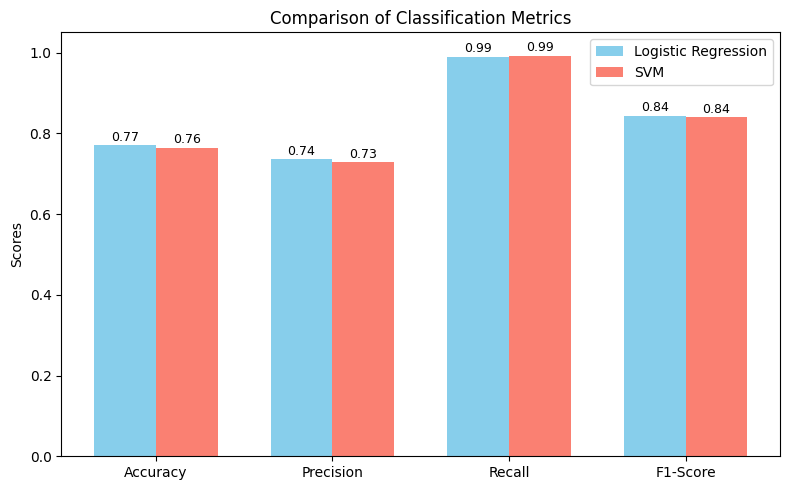

In [34]:
lr_accuracy = accuracy_score(y_test_enc, lr_test_preds)
lr_precision = precision_score(y_test_enc, lr_test_preds)
lr_recall = recall_score(y_test_enc, lr_test_preds)
lr_f1 = f1_score(y_test_enc, lr_test_preds)

svm_accuracy = accuracy_score(y_test_enc, svm_test_preds)
svm_precision = precision_score(y_test_enc, svm_test_preds)
svm_recall = recall_score(y_test_enc, svm_test_preds)
svm_f1 = f1_score(y_test_enc, svm_test_preds)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]

x = np.arange(len(metrics))  
width = 0.35  

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, lr_scores, width, label='Logistic Regression', color='skyblue')
bars2 = ax.bar(x + width/2, svm_scores, width, label='SVM', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

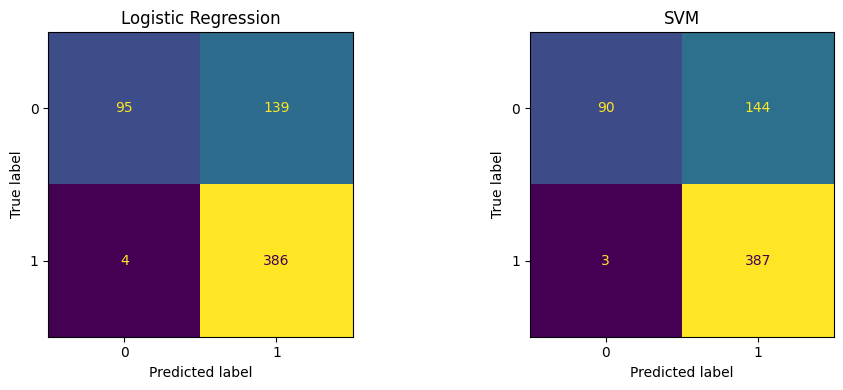

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_lr = confusion_matrix(y_test_enc, lr_test_preds)
cm_svm = confusion_matrix(y_test_enc, svm_test_preds)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(ax=axes[0], colorbar=False)
axes[0].set_title("Logistic Regression")

# SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(ax=axes[1], colorbar=False)
axes[1].set_title("SVM")

plt.tight_layout()
plt.show()

Dựa trên các thang đo và đặc biệt là f1-score:
- Hai mô hình Logistic Regression và SVM có điểm số gần như ngang nhau trên mọi metrics
- Chênh lệch chỉ là 0.01
- Hai mô hình thường xuyên dự đoán nhầm nhãn 0 thành 1

Nếu chọn mô hình để deploy, ta nên chọn Logistic Regression vì mô hình này có khả năng diễn giải (qua xác suất) nhiều hơn là SVM chỉ phân lớp

## Create pipeline model

In [43]:
from sklearn.pipeline import Pipeline
pipeline_pca_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components_95)),
    ('lr', LogisticRegression(class_weight='balanced',max_iter = 2000, **lr_grid.best_params_))
])

In [44]:
pipeline_pca_lr.fit(X_train_flat, y_train_enc)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=546)),
                ('lr',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=2000, penalty='l1',
                                    solver='saga'))])

In [45]:
test_preds = pipeline_pca_lr.predict(X_test_flat)
print("Test Accuracy:", accuracy_score(y_test_enc, test_preds))
print("\nClassification Report:")
print(classification_report(y_test_enc, test_preds, target_names=encoder.classes_))

Test Accuracy: 0.7676282051282052

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.94      0.41      0.57       234
   PNEUMONIA       0.73      0.98      0.84       390

    accuracy                           0.77       624
   macro avg       0.84      0.70      0.70       624
weighted avg       0.81      0.77      0.74       624



### Save model

In [47]:
import pickle

with open('pca_lr_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline_pca_lr, f)

## Deployment 
- Webapp: https://xray-pneunomia-detection-bylocluclak.streamlit.app/
- Github repo: https://github.com/locluclak/xray-pneunomia-detection